Tabulates population and number of census tracts for each county.

In [2]:
import openpyxl, pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns

print('Opening workbook...')

Opening workbook...


In [3]:
wb = openpyxl.load_workbook('censuspopdata.xlsx')

sheet = wb.get_sheet_by_name('Population by Census Tract')
countyData = {}

C:\Users\rking\AppData\Local\Temp\ipykernel_27336\557115629.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = wb.get_sheet_by_name('Population by Census Tract')


In [4]:
print('Reading rows...')

Reading rows...


In [5]:

for row in range(2, sheet.max_row + 1):
       # Each row in the spreadsheet has data for one census tract.
    state  = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value
    pop    = sheet['D' + str(row)].value

    # to make sure the key for this state exists.
    countyData.setdefault(state, {})
    # to make sure the key for this county in this state exists.
    countyData[state].setdefault(county, {'tracts': 0, 'pop': 0})

    # Each row represents one census tract, so increment by one.
    countyData[state][county]['tracts'] += 1
    # Increase the county pop by the pop in this census tract.
    countyData[state][county]['pop'] += int(pop)

In [6]:
print('Writing results...')

Writing results...


In [7]:
resultFile = open('census2010.py', 'w')
resultFile.write('allData = ' + pprint.pformat(countyData))
resultFile.close()
print('Done.')

Done.


In [8]:
for row in range(2, sheet.max_row + 1):
       # Each row in the spreadsheet has data for one census tract.
    state  = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value
    pop    = sheet['D' + str(row)].value

    # to make sure the key for this state exists.
    countyData.setdefault(state, {})
    # to make sure the key for this county in this state exists.
    countyData[state].setdefault(county, {'tracts': 0, 'pop': 0})

    # Each row represents one census tract, so increment by one.
    countyData[state][county]['tracts'] += 1
    # Increase the county pop by the pop in this census tract.
    countyData[state][county]['pop'] += int(pop)

In [9]:
countyData

{'AL': {'Autauga': {'tracts': 24, 'pop': 109142},
  'Baldwin': {'tracts': 62, 'pop': 364530},
  'Barbour': {'tracts': 18, 'pop': 54914},
  'Bibb': {'tracts': 8, 'pop': 45830},
  'Blount': {'tracts': 18, 'pop': 114644},
  'Bullock': {'tracts': 6, 'pop': 21828},
  'Butler': {'tracts': 18, 'pop': 41894},
  'Calhoun': {'tracts': 62, 'pop': 237144},
  'Chambers': {'tracts': 18, 'pop': 68430},
  'Cherokee': {'tracts': 12, 'pop': 51978},
  'Chilton': {'tracts': 18, 'pop': 87286},
  'Choctaw': {'tracts': 8, 'pop': 27718},
  'Clarke': {'tracts': 18, 'pop': 51666},
  'Clay': {'tracts': 8, 'pop': 27864},
  'Cleburne': {'tracts': 8, 'pop': 29944},
  'Coffee': {'tracts': 28, 'pop': 99896},
  'Colbert': {'tracts': 28, 'pop': 108856},
  'Conecuh': {'tracts': 10, 'pop': 26456},
  'Coosa': {'tracts': 6, 'pop': 23078},
  'Covington': {'tracts': 28, 'pop': 75530},
  'Crenshaw': {'tracts': 12, 'pop': 27812},
  'Cullman': {'tracts': 36, 'pop': 160812},
  'Dale': {'tracts': 28, 'pop': 100502},
  'Dallas': {

In [95]:

df = pd.DataFrame(countyData['WY'])
df = df.transpose()
df = pd.DataFrame(df['pop'])
#df = pd.DataFrame(df, columns=['County', 'Population'])
df

,pop
Weston,47142
Albany,217794
Big Horn,70008
Campbell,276798
Carbon,95310
Converse,82998
Crook,42498
Fremont,240738
Goshen,79494
Hot Springs,28872


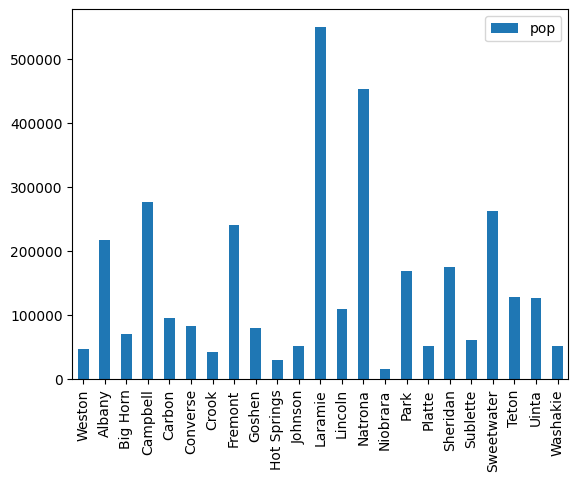

In [101]:
ax = df.plot.bar(rot=90)
#ax = df.plot.xticks(rotation='vertical')
plt.show()

In [17]:
import os
os.chdir(r'C:\Users\rking\Desktop\myprojects\Excel Stuff')
import census2010
census2010.allData['AK']['Anchorage']

{'pop': 291826, 'tracts': 55}

In [18]:
anchoragePop = census2010.allData['AK']['Anchorage']['pop']
print('The 2010 population of Anchorage was ' + str(anchoragePop))

The 2010 population of Anchorage was 291826
